In [4]:
import pandas as pd

In [5]:
food_df = pd.read_excel('food_data.xlsx')

In [6]:
food_df

,Name,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,geoData,global_id
0,СМЕТАНА,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",Контактный телефон: (499) 183-14-10,48,нет,Геоданные: ↴\nКоординаты: [\n 37.714565000436...,637376221
1,Родник,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",Контактный телефон: (495) 676-55-35,35,нет,Геоданные: ↴\nКоординаты: [\n 37.673306130034...,637376331
2,Кафе «Академия»,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, Абельмановская улица, дом 6",Контактный телефон: (495) 662-30-10,95,нет,Геоданные: ↴\nКоординаты: [\n 37.669647596938...,637376349
3,ГБОУ «Школа № 1430 имени Героя Социалистическо...,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",Контактный телефон: (499) 908-06-15,240,нет,"Геоданные: ↴\nКоординаты: [\n 37.56694,\n 55...",637376480
4,Брусника,да,Брусника,кафе,Центральный административный округ,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",Контактный телефон: (495) 697-04-89,10,нет,"Геоданные: ↴\nКоординаты: [\n 37.59812754844,...",637376481
...,...,...,...,...,...,...,...,...,...,...,...,...
17220,Суши,нет,NaN,магазин (отдел кулинарии),Восточный административный округ,район Измайлово,"Российская Федерация, город Москва, внутригоро...",Контактный телефон: (925) 195-18-19,0,нет,Геоданные: ↴\nКоординаты: [\n 37.782898134930...,1111677810
17221,Ресторан «Аист»,нет,NaN,ресторан,Центральный административный округ,Пресненский район,"город Москва, Малая Бронная улица, дом 8, стро...",Контактный телефон: (499) 940-70-40,200,нет,Геоданные: ↴\nКоординаты: [\n 37.596924999999...,1111678199
17222,Суши Wok,да,Суши Wok,кафе,Юго-Западный административный округ,район Южное Бутово,"город Москва, Скобелевская улица, дом 19",Контактный телефон: (499) 754-44-44,22,нет,"Геоданные: ↴\nКоординаты: [\n 37.556331,\n 5...",1111678251
17223,Теремок,да,Теремок,предприятие быстрого обслуживания,Южный административный округ,Даниловский район,"город Москва, улица Ленинская Слобода, дом 17",Контактный телефон: нет телефона,48,нет,"Геоданные: ↴\nКоординаты: [\n 37.657186,\n 5...",1111678371


In [7]:
food_network_df = food_df[['Name','IsNetObject','AdmArea','District']]

In [8]:
food_networks_dict = food_network_df.to_dict('index')

In [9]:
short_food_network_df = food_network_df.replace(to_replace='Центральный административный округ',value='ЦАО').replace(to_replace='Восточный административный округ',value='ВАО').replace(to_replace='Западный административный округ',value='ЗАО').replace(to_replace='Северный административный округ',value='САО').replace(to_replace='Южный административный округ',value='ЮАО').replace(to_replace='Северо-Восточный административный округ',value='СВАО').replace(to_replace='Юго-Западный административный округ',value='ЮЗАО').replace(to_replace='Северо-Восточный административный округ',value='СВАО').replace(to_replace='Северо-Западный административный округ',value='СЗАО').replace(to_replace='Юго-Восточный административный округ',value='ЮВАО').replace(to_replace='Зеленоградский административный округ',value='ЗелАО').replace(to_replace='Новомосковский административный округ',value='НАО').replace(to_replace='Троицкий административный округ',value='ТАО')

In [10]:
short_food_network_df

,Name,IsNetObject,AdmArea,District
0,СМЕТАНА,нет,СВАО,Ярославский район
1,Родник,нет,ЦАО,Таганский район
2,Кафе «Академия»,нет,ЦАО,Таганский район
3,ГБОУ «Школа № 1430 имени Героя Социалистическо...,нет,СВАО,район Лианозово
4,Брусника,да,ЦАО,район Арбат
...,...,...,...,...
17220,Суши,нет,ВАО,район Измайлово
17221,Ресторан «Аист»,нет,ЦАО,Пресненский район
17222,Суши Wok,да,ЮЗАО,район Южное Бутово
17223,Теремок,да,ЮАО,Даниловский район


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

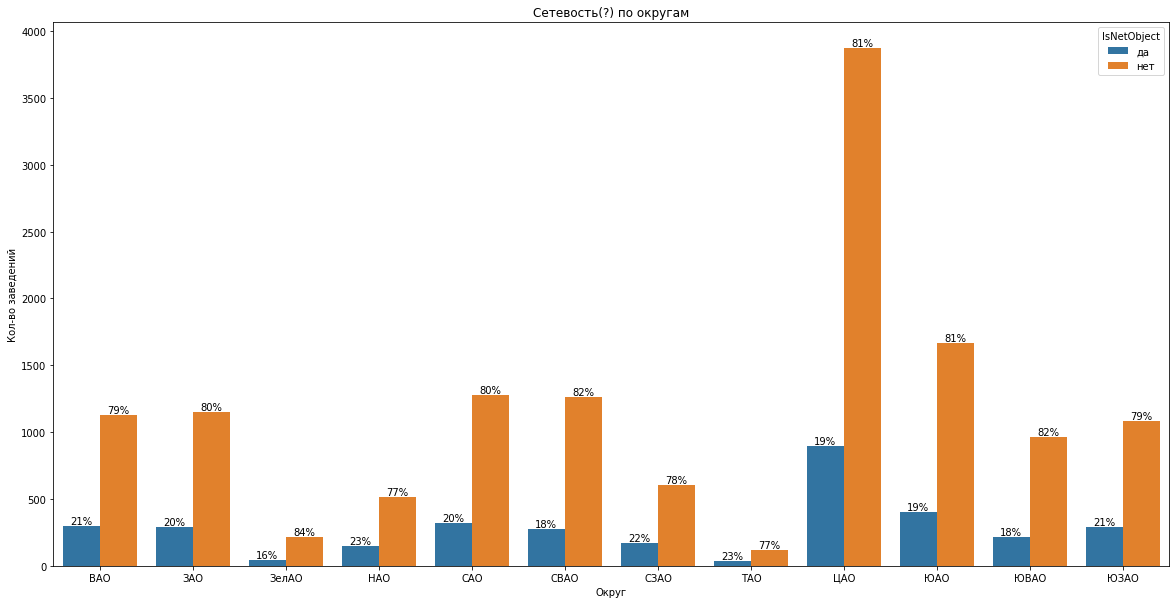

In [25]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

df2 = short_food_network_df[['Name', 'IsNetObject', 'AdmArea']].groupby(['IsNetObject', 'AdmArea'], as_index=False).count()
df2.columns = ['IsNetObject', 'AdmArea', 'total']

plt.figure(figsize=(20,10))
ax = sns.barplot(x="AdmArea", y="total", hue='IsNetObject', data=df2);
barPerc(df2,"AdmArea", ax)
plt.title('Сетевость(?) по округам')
plt.xlabel('Округ')
plt.ylabel('Кол-во заведений');